In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv(r"C:\Users\asus\OneDrive\Desktop\dataset\gurgaon_properties_outliers_treated.csv")

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,NaN,900.0,0,0,0,0,0,0,28,450.000000
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,NaN,650.0,0,0,0,0,0,2,37,325.013001
2,flat,tulsiani easy in homes,sohna road road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2,2,3,12.0,NaN,New Property,NaN,NaN,NaN,595.0,0,0,0,0,0,0,36,297.530497
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),2,2,2,2.0,NaN,Undefined,NaN,NaN,NaN,1200.0,1,0,0,0,0,0,76,600.000000
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,Super Built up area 1345(124.95 sq.m.),2,2,3,5.0,NaN,Under Construction,NaN,1345.0,NaN,NaN,1,0,0,0,0,0,0,672.559570


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                695
facing                  992
agePossession             0
noOfFloor              2820
super_built_up_area    1621
built_up_area          1966
carpet_area            1662
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

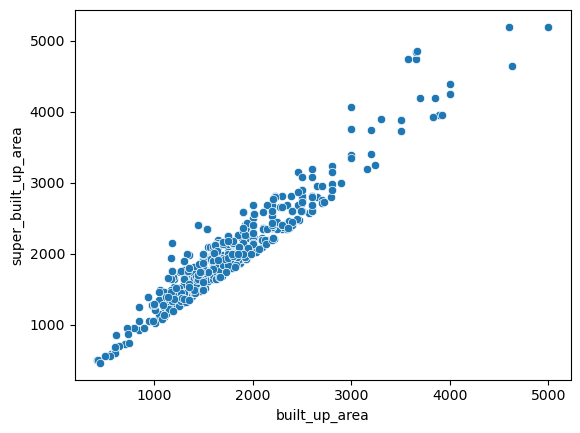

In [7]:
sns.scatterplot(data=df,x='built_up_area',y='super_built_up_area')

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

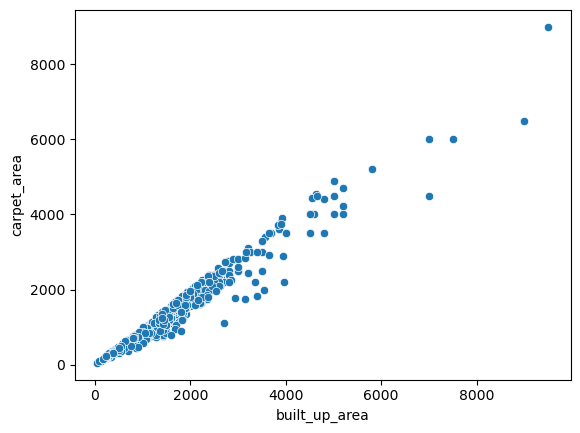

In [8]:
sns.scatterplot(data=df,x='built_up_area',y='carpet_area')

In [9]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3490    False
3491    False
3492    False
3493    False
3494    False
Length: 3495, dtype: bool

In [10]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [11]:
all_present_df.shape

(531, 25)

In [12]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [13]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [14]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [15]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [16]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
30,flat,bhawna cghs,sector 43,3.25,10156.0,3200.078771,Super Built up area 3200(297.29 sq.m.)Carpet a...,4,4,3+,12.0,NaN,Moderately Old,NaN,3200.0,NaN,3000.0,0,0,0,1,0,2,119,800.019693
35,flat,chintels paradiso,sector 109,1.80,8866.0,2030.227837,Super Built up area 2030(188.59 sq.m.)Carpet a...,3,3,2,0.0,East,Moderately Old,NaN,2030.0,NaN,1785.0,0,1,0,0,0,0,83,676.742612
36,flat,breez global hill view,sohna road road,0.30,5403.0,555.247085,Super Built up area 655(60.85 sq.m.)Carpet are...,2,2,2,6.0,North-East,New Property,NaN,655.0,NaN,555.0,0,0,0,0,0,0,109,277.623542
57,flat,silverglades the melia,sohna road road,1.01,7000.0,1442.857143,Super Built up area 1450(134.71 sq.m.)Carpet a...,2,2,3,12.0,NaN,Undefined,NaN,1450.0,NaN,950.0,1,0,0,0,0,0,80,721.428571
59,flat,umang winter hills,sector 77,0.99,7857.0,1260.022910,Super Built up area 1260(117.06 sq.m.)Carpet a...,2,2,2,1.0,North,Relatively New,NaN,1260.0,NaN,1000.0,0,0,0,0,0,0,97,630.011455


In [17]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_11940\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [18]:
df.update(sbc_df)

In [19]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                695
facing                  992
agePossession             0
noOfFloor              2820
super_built_up_area    1621
built_up_area          1545
carpet_area            1662
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [20]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [21]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,Super Built up area 1345(124.95 sq.m.),2,2,3,5.0,NaN,Under Construction,NaN,1345.0,NaN,NaN,1,0,0,0,0,0,0,672.559570
6,flat,the cocoon,dwarka expressway,2.00,13333.0,1500.037501,Super Built up area 1500(139.35 sq.m.),3,3,3,5.0,NaN,New Property,NaN,1500.0,NaN,NaN,0,0,0,0,0,0,0,500.012500
13,flat,godrej,sector 33,0.95,6859.0,1385.041551,Super Built up area 1385(128.67 sq.m.),2,2,3+,3.0,South-East,Under Construction,NaN,1385.0,NaN,NaN,0,0,0,0,0,0,0,692.520776
14,flat,shree vardhman flora,sector 90,0.70,5384.0,1300.148588,Super Built up area 1300(120.77 sq.m.),2,2,3,13.0,NaN,New Property,NaN,1300.0,NaN,NaN,1,0,0,0,0,0,15,650.074294
18,flat,central park flower valley,sector 33 road,2.20,10476.0,2100.038183,Super Built up area 2100(195.1 sq.m.),3,3,3,12.0,North-East,New Property,NaN,2100.0,NaN,NaN,0,1,0,0,0,2,49,700.012728


In [22]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_11940\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [23]:
df.update(sb_df)

In [24]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                695
facing                  992
agePossession             0
noOfFloor              2820
super_built_up_area    1621
built_up_area           671
carpet_area            1662
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [25]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [26]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,NaN,900.0,0,0,0,0,0,0,28,450.000000
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,NaN,650.0,0,0,0,0,0,2,37,325.013001
2,flat,tulsiani easy in homes,sohna road road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2,2,3,12.0,NaN,New Property,NaN,NaN,NaN,595.0,0,0,0,0,0,0,36,297.530497
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),2,2,2,2.0,NaN,Undefined,NaN,NaN,NaN,1200.0,1,0,0,0,0,0,76,600.000000
7,flat,ats triumph,sector 104,1.80,7860.0,2290.076336,Carpet area: 2290 (212.75 sq.m.),3,4,3,14.0,NaN,New Property,NaN,NaN,NaN,2290.0,0,0,0,0,0,0,60,763.358779


In [27]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_11940\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [28]:
df.update(c_df)

In [29]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                695
facing                  992
agePossession             0
noOfFloor              2820
super_built_up_area    1621
built_up_area             0
carpet_area            1662
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

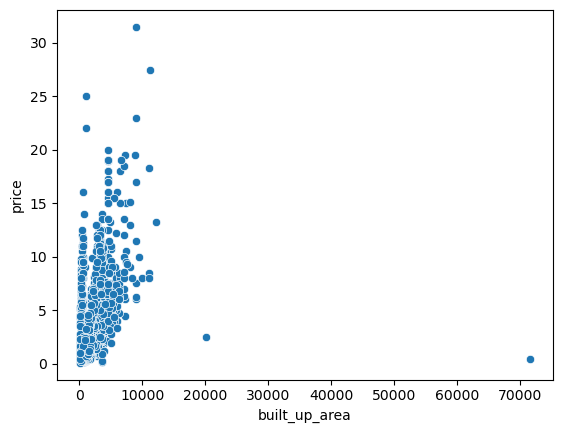

In [31]:
sns.scatterplot(data=df,x='built_up_area',y='price')

In [34]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [35]:
anamoly_df.sample(5)

,price,area,built_up_area
3393,4.25,1350.0,161.0
3467,4.45,1265.0,150.0
2836,5.75,1935.0,1935.0
3372,25.00,8036.0,1000.0
2853,8.80,2115.0,267.0


In [36]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [37]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

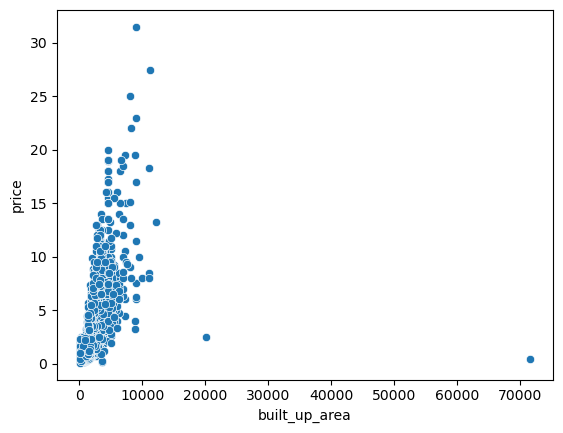

In [39]:
sns.scatterplot(data=df,x='built_up_area',y='price')

In [42]:
# Assuming df is your DataFrame
df = df[df['built_up_area'] < 20000]

<Axes: xlabel='built_up_area', ylabel='price'>

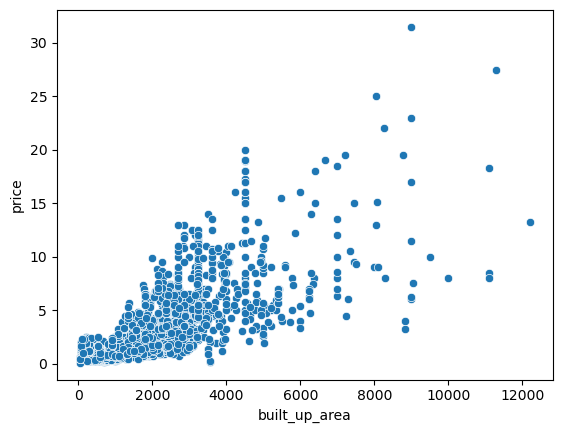

In [43]:
sns.scatterplot(data=df,x='built_up_area',y='price')

In [44]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [45]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,2,2,1,4.0,West,Relatively New,NaN,1000.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,2,2,1,1.0,West,Old Property,NaN,722.0,0,0,0,0,0,2,37
2,flat,tulsiani easy in homes,sohna road road,0.40,6722.0,2,2,3,12.0,NaN,New Property,NaN,661.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,2,2,2,2.0,NaN,Undefined,NaN,1333.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,2,2,3,5.0,NaN,Under Construction,NaN,1217.0,1,0,0,0,0,0,0


In [46]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum            695
facing              992
agePossession         0
noOfFloor          2818
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [47]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
169,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,NaN,1758.0,0,0,0,0,0,0,0
199,flat,"ganpati apartment 2, laxman vihar phase 1",sector 4,0.45,4705.0,2,2,1,NaN,East,Relatively New,NaN,944.0,0,0,0,0,0,0,46
2023,flat,huda housing board society,sector 52,0.45,9745.0,1,1,0,NaN,North-West,Moderately Old,NaN,513.0,0,0,0,1,0,2,43
2573,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,NaN,1625.0,0,0,0,0,0,0,0
2721,flat,apna enclave,sector 3,0.80,6153.0,3,3,1,NaN,NaN,Old Property,NaN,1000.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3490,house,independent,sector 57,4.75,28788.0,3,3,3,NaN,North-West,Moderately Old,2.0,1650.0,0,0,1,0,0,2,96
3491,house,dlf city phase 1,sector 26,5.50,30556.0,4,4,3,NaN,North-East,Moderately Old,2.0,1800.0,1,1,0,1,0,0,69
3492,house,dlf city plots phase 2,sector 25,4.25,31481.0,3,2,3,NaN,North,Old Property,2.0,1350.0,1,0,0,0,0,0,35
3493,house,dlf city phase 1,sector 26,4.50,33333.0,3,3,2,NaN,East,Moderately Old,2.0,1350.0,1,1,0,0,0,0,70


In [50]:
df[df['property_type'] == 'house']['floorNum']

2805   NaN
2806   NaN
2807   NaN
2808   NaN
2809   NaN
        ..
3490   NaN
3491   NaN
3492   NaN
3493   NaN
3494   NaN
Name: floorNum, Length: 690, dtype: float64

In [51]:
df['floorNum'].fillna(2.0,inplace=True)

In [52]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing              992
agePossession         0
noOfFloor          2818
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [53]:
1011/df.shape[0]

0.28943601488691667

### facing

<Axes: ylabel='count'>

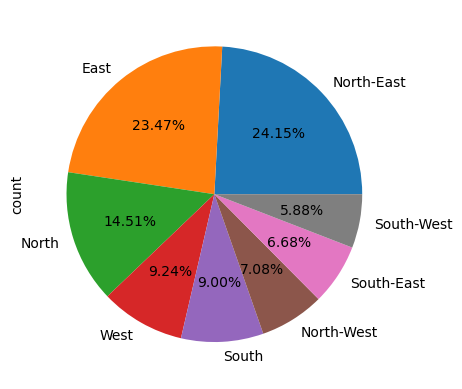

In [54]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [56]:
df.drop(columns=['facing','noOfFloor'],inplace=True)

In [57]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1249,flat,emaar mgf emerald floors premier,sector 65,2.40,14545.0,3,3,3,3.0,Relatively New,1600.0,1,1,0,0,0,2,49
1096,flat,tulip violet,sector 69,1.38,8966.0,3,3,1,12.0,Relatively New,1392.0,0,0,0,1,0,0,86
324,flat,dlf the skycourt,sector 86,1.54,9221.0,3,3,3+,15.0,Relatively New,1780.0,0,1,0,0,0,0,174
223,flat,emaar imperial gardens,sector 102,2.05,9876.0,3,4,3+,14.0,Relatively New,2250.0,0,1,0,0,0,0,116
1738,flat,dlf new town heights,sector 90,1.88,6894.0,4,4,3+,20.0,Relatively New,2726.0,0,1,0,1,0,0,145


In [63]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2573,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [58]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [64]:
df.drop(index=[2573],inplace=True)

In [65]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [66]:
df['agePossession'].value_counts()

agePossession
Relatively New        1590
New Property           552
Moderately Old         521
Undefined              419
Old Property           278
Under Construction     131
Name: count, dtype: int64

In [67]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3,flat,smart world orchard,sector 61,1.47,12250.0,2,2,2,2.0,Undefined,1333.0,1,0,0,0,0,0,76
5,flat,signature global infinity mall,sector 36,0.41,6269.0,2,2,3,3.0,Undefined,654.0,0,0,0,0,0,0,0
9,flat,raheja revanta,sector 78,4.75,16885.0,3,3,2,31.0,Undefined,2813.0,0,1,0,0,0,0,100
10,flat,signature global city 81,sector 81,0.96,9767.0,2,2,2,1.0,Undefined,1194.0,0,0,0,0,0,0,49
15,flat,sobha city,sector 108,3.95,16859.0,4,5,3,25.0,Undefined,2343.0,0,0,0,0,0,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,house,independent,sector 108,1.34,5000.0,1,1,0,2.0,Undefined,2680.0,0,0,0,0,0,0,0
3158,house,independent,sector 39,0.34,7556.0,1,1,1,2.0,Undefined,450.0,0,0,0,0,0,0,0
3159,house,independent,sector 105,9.90,49500.0,2,2,2,2.0,Undefined,2000.0,0,0,0,0,0,0,0
3160,house,independent,sector 43,2.15,13030.0,1,1,0,2.0,Undefined,1650.0,0,0,0,0,0,0,0


In [68]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [69]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [70]:
df['agePossession'].value_counts()

agePossession
Relatively New        1764
New Property           642
Moderately Old         561
Old Property           317
Under Construction     133
Undefined               74
Name: count, dtype: int64

In [71]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [72]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [73]:
df['agePossession'].value_counts()

agePossession
Relatively New        1778
New Property           647
Moderately Old         564
Old Property           328
Under Construction     133
Undefined               41
Name: count, dtype: int64

In [74]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [75]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [76]:
df['agePossession'].value_counts()

agePossession
Relatively New        1791
New Property           647
Moderately Old         592
Old Property           328
Under Construction     133
Name: count, dtype: int64

In [77]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [78]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [79]:
df.shape

(3491, 18)